In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [3]:
df = sb.events(match_id=3835329)

In [4]:
im = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [5]:
allshots = pd.read_csv("allshots.csv")
allshots = allshots[['minute', 'team', 'shot_statsbomb_xg', 'player', 'shot_outcome',]]
allshots = allshots.sort_values(by =['team', 'minute'], ascending = [True, True])
allshots = allshots.reset_index()

In [6]:
allgoals = pd.read_csv("goals.csv")

In [7]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
ateamColor = "#003581"
MVP = "Pernille Mosegaard Harder"
MVPname = "Pernille Harder"
tournament = "Women's EURO 2022"
textColor = "black"
hteam = allshots["team"].iloc[0]
ateam = allshots["team"].iloc[-1]

In [10]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]
h_cumulative = nums_cumulative_sum(h_Xg)
a_cumulative = nums_cumulative_sum(a_Xg)

In [11]:
a_Xg = [0]
h_Xg = [0]
a_min = [0]
h_min = [0]
h_min_goals = []
h_goals = []


for x in range(len(allshots["shot_statsbomb_xg"])):
    if allshots["team"][x]==hteam:
        h_Xg.append(allshots["shot_statsbomb_xg"][x])
        h_min.append(allshots["minute"][x]) 
     
    if allshots["team"][x]==ateam:
           a_Xg.append(allshots["shot_statsbomb_xg"][x])
           a_min.append(allshots["minute"][x])
    

alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

last_min = max(df['minute'])

h_min.append(last_min)
a_min.append(last_min)

h_cumulative.append(hlast)
a_cumulative.append(alast)

In [12]:
xg_max = max(alast, hlast)

In [13]:
dfFin = df[df["team"] == ateam]
dfDen = df[df["team"] == hteam]

In [93]:
shotsDen = (shots.shape[0]+ goals.shape[0])
shotsFin = shots_fin.shape[0]

In [14]:
mplpitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=1, 
                 pitch_color=pitchColor, line_color=linesColor)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)

In [15]:
lineup = sb.lineups(match_id=3835329)

In [16]:
lineupDK = sb.lineups(match_id=3835329)[hteam]
lineupDK = lineupDK.drop("cards", axis=1)
lineupDK = lineupDK.drop("country", axis=1)
lineupDK = lineupDK.drop("positions", axis=1)
lineupDK = lineupDK.rename(columns={'player_id': 'passer'})
lineupDK = lineupDK.sort_values("jersey_number", ascending=True)

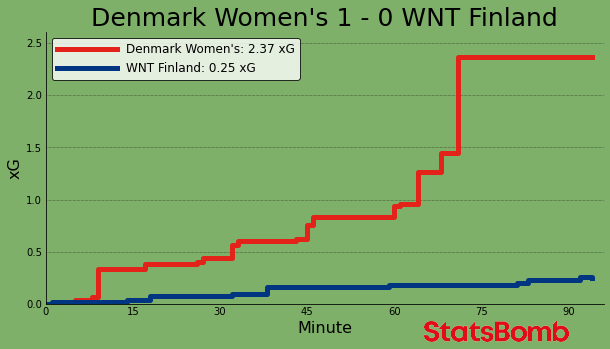

In [83]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(pitchColor)
ax.patch.set_facecolor(pitchColor)

ax.grid(ls='dotted',lw=.5,color='black',axis='y',zorder=1)

spines = ['top','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.xlabel('Minute', color=textColor, fontsize=16)
plt.ylabel('xG', color=textColor, fontsize=16)
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlim([0, last_min+2])
plt.ylim([0, xg_max*1.1])

ax.tick_params(axis="both",length=0)


ax.step(x=h_min, y=h_cumulative, linewidth=5, where='post', color= hteamColor, label= f"{hteam}: {hlast} xG")
ax.step(x=a_min, y=a_cumulative, linewidth=5, where='post', color=ateamColor, label= f"{ateam}: {alast} xG")

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=12, loc='upper left')

ax.set_title(f"{hteam} {hscore} - {ascore} {ateam}", fontsize=25, color=textColor)

ax3 = fig.add_axes([0.65, -0.002, 0.20, 0.10])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig('viz/xG Flow Chart', dpi=300, bbox_inches='tight')

In [143]:
shots = df[df.type == "Shot"]
shots = shots[shots.team == hteam]

shots = shots[['team', 'player', 'minute', 'second', 'location', 'shot_statsbomb_xg', 'shot_outcome', "type", "id"]]

shots['x'] = shots.location.apply(lambda x: x[0])
shots['y'] = shots.location.apply(lambda x: x[1])
shots = shots.drop('location', axis=1)


shots_fin = df[df.type == "Shot"]
shots_fin = shots_fin[shots_fin.team == ateam]

shots_fin = shots_fin[['team', 'player', 'minute', 'second', 'location', 'shot_statsbomb_xg', 'shot_outcome', "type"]]

shots_fin['x'] = shots_fin.location.apply(lambda x: x[0])
shots_fin['y'] = shots_fin.location.apply(lambda x: x[1])
shots_fin = shots_fin.drop('location', axis=1)

goals_fin = shots_fin[shots_fin.shot_outcome == 'Goal']
shots_fin = shots_fin[shots_fin.shot_outcome != 'Goal']
goals = shots[shots.shot_outcome == 'Goal']
shots = shots[shots.shot_outcome != 'Goal']

goals["player"] = goals["player"].apply(lambda x: str(x).split()[-1])
goals_fin["player"] = goals_fin["player"].apply(lambda x: str(x).split()[-1])

In [19]:
shotsDen_reverseX = shots
shotsDen_reverseX['x'] = mplpitch.dim.right - shotsDen_reverseX.x

In [20]:
goalsDen_reverseX = goals
goalsDen_reverseX['x'] = mplpitch.dim.right - goalsDen_reverseX.x

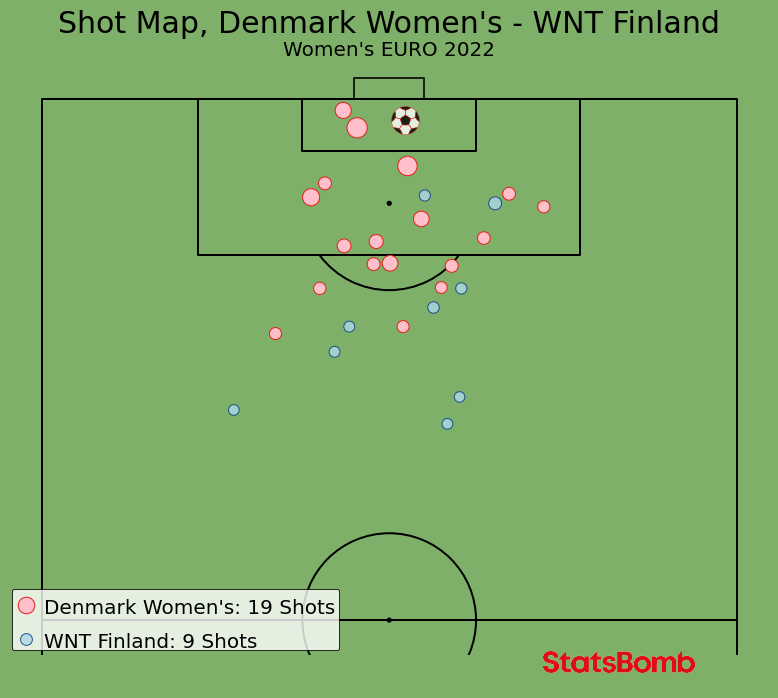

In [123]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8,
                      pitch_color=pitchColor, line_color=linesColor)

fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, 
                    axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor(figColor)

scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 130, 
                              c='pink', edgecolors= hteamColor, marker='o', 
                              alpha = 1, ax=axs['pitch'], label=f"{hteam}: {shotsDen} Shots")

scatter_goals= pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 130, 
                             c="white", edgecolor= hteamColor, marker="football", ax=axs["pitch"], 
                             alpha = .80)

scatter_shots_fin = pitch.scatter(shots_fin.x, shots_fin.y, s=(shots_fin.shot_statsbomb_xg * 900) + 100,
                                  c='lightblue', edgecolors=ateamColor, marker='o', 
                                  alpha = .80, label=f"{ateam}: {shotsFin} Shots", ax=axs['pitch'])


axs["title"].text (0.5, 0.7, (f"Shot Map, {hteam} - {ateam}"), color=textColor, va="center", ha="center", fontsize=30)


axs["title"].text (0.5, 0.25, tournament, color=textColor, va="center", ha="center", fontsize=20)

legend = axs['pitch'].legend(loc='lower left', facecolor="white", edgecolor="black", labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_va('center')
    
ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)


#plt.savefig(f'viz/Shot Map, {hteam} v {ateam}', dpi=300, bbox_inches='tight')

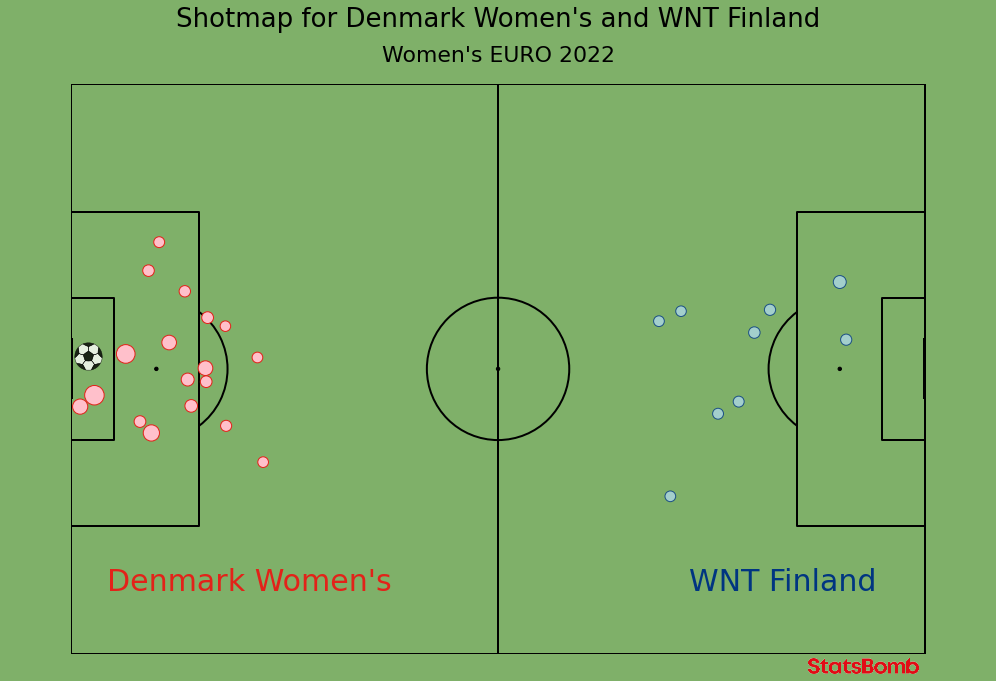

In [124]:
fig, axs = mplpitch.jointgrid(figheight=11, left=None, bottom=0.075, marginal=0.1, 
                              space=0, grid_width=0.9, title_height=0, axis=False, endnote_height=0, grid_height=0.8)
plt.gca().invert_yaxis()
fig.set_facecolor(figColor)

scatter_shots = mplpitch.scatter(shotsDen_reverseX.x, shotsDen_reverseX.y, 
                                 s=(shotsDen_reverseX.shot_statsbomb_xg * 900) + 100, c='pink', edgecolors= hteamColor,
                                 marker='o', alpha = 1, ax=axs['pitch'])

scatter_goals= mplpitch.scatter(goalsDen_reverseX.x, goalsDen_reverseX.y, 
                                s=(goalsDen_reverseX.shot_statsbomb_xg * 900) + 100, c="white", 
                                marker="football", ax=axs["pitch"], alpha = .80)

scatter_shots_fin = mplpitch.scatter(shots_fin.x, shots_fin.y, 
                                     s=(shots_fin.shot_statsbomb_xg * 900) + 100, c='lightblue', edgecolors=ateamColor, 
                                     marker='o', alpha = .80, ax=axs['pitch'])

txt1 = axs['pitch'].text(x=25, y=10, s= hteam ,color=hteamColor,
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=100, y=10, s= ateam, color=ateamColor,
                         ha='center', va='center', fontsize=30)

txt3 = axs['pitch'].text(60, 89, (f"Shotmap for {hteam} and {ateam}"), color=textColor,
                  fontsize=26, ha='center', va='center')

text4 = axs['pitch'].text(60, 84, tournament, color= textColor, fontsize=22, ha='center', va='center')

ax3 = fig.add_axes([0.7, 0.050, 0.27, 0.02])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Shotmap, {hteam} v {ateam}, full pitch', dpi=300, bbox_inches='tight')

In [76]:
pass_den = df[df.type == "Pass"]
pass_den = pass_den[pass_den.team == hteam]
pass_den = pass_den[(pass_den["pass_type"]!="Kick Off") & (pass_den["pass_type"]!="Goal Kick") 
                    & (pass_den["pass_type"]!="Free Kick") & (pass_den["pass_type"]!="Throw-in") 
                    & (pass_den["pass_type"]!="Corner") & (pass_den["pass_outcome"]!="Incomplete") 
                    & (pass_den["pass_outcome"]!="Pass Offisde") & (pass_den["pass_outcome"]!="Out") 
                    & (pass_den["pass_outcome"]!="Unknown")]

pass_den = pass_den[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                     "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_den['x_start'] = pass_den.location.apply(lambda x: x[0])
pass_den['y_start'] = pass_den.location.apply(lambda x: x[1])

pass_den['x_end'] = pass_den.pass_end_location.apply(lambda x: x[0])
pass_den['y_end'] = pass_den.pass_end_location.apply(lambda x: x[1])
pass_den = pass_den.drop('location', axis=1)
pass_den = pass_den.drop('pass_end_location', axis=1)

countPassDen = pass_den.shape[0]

In [74]:
passHarder = df[df["player"]== MVP]
passHarder = passHarder[(passHarder["type"]== "Pass") & (passHarder["pass_outcome"]!="Incomplete") 
                        & (passHarder["pass_outcome"]!="Out")]
passHarder = passHarder[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                         "pass_end_location", "type"]]

passHarder['x_start'] = passHarder.location.apply(lambda x: x[0])
passHarder['y_start'] = passHarder.location.apply(lambda x: x[1])

passHarder['x_end'] = passHarder.pass_end_location.apply(lambda x: x[0])
passHarder['y_end'] = passHarder.pass_end_location.apply(lambda x: x[1])
passHarder = passHarder.drop('location', axis=1)
passHarder = passHarder.drop('pass_end_location', axis=1)

countPassHarder = passHarder.shape[0]

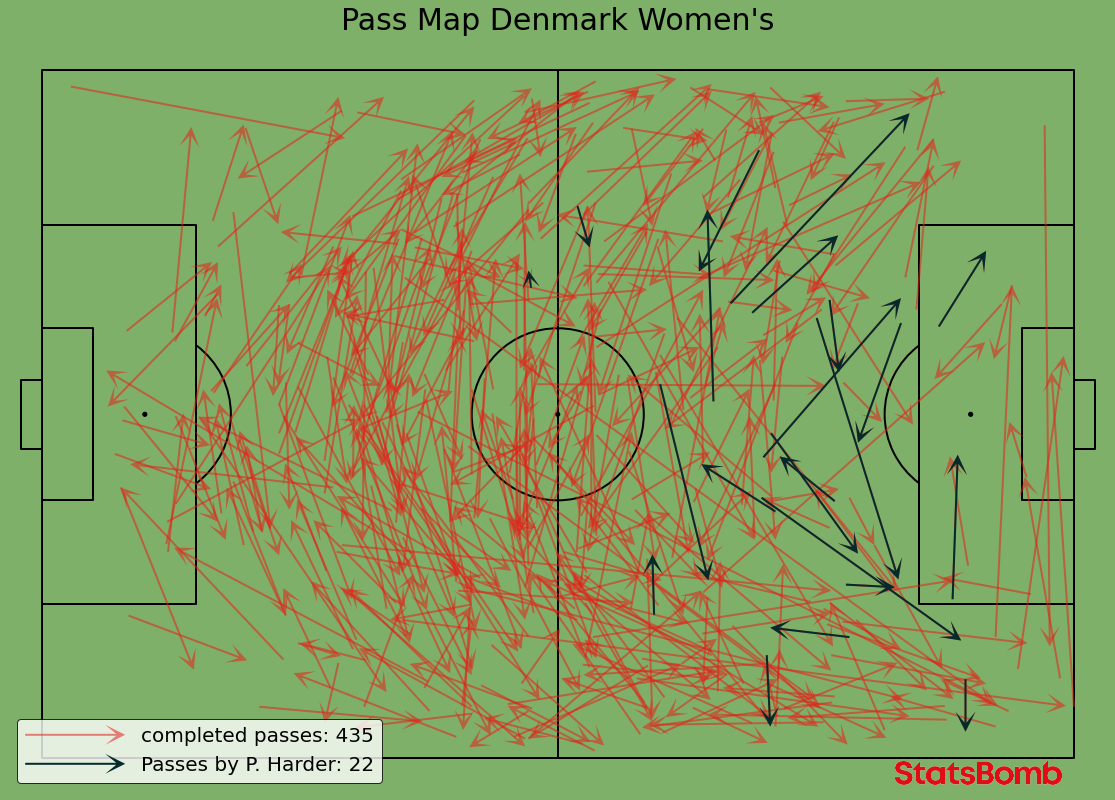

In [95]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pitch.arrows(pass_den.x_start, pass_den.y_start,
             pass_den.x_end, pass_den.y_end, width=2,
             headwidth=10, headlength=10, color= hteamColor, ax=ax, label=f'completed passes: {countPassDen}', alpha = .55)

pitch.arrows(passHarder.x_start, passHarder.y_start,
             passHarder.x_end, passHarder.y_end, width=2,
             headwidth=10, headlength=10, color='#042A2B', ax=ax, label=f'Passes by P. Harder: {countPassHarder}', alpha = 1)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Map {hteam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Map {hteam}', dpi=300, bbox_inches='tight')

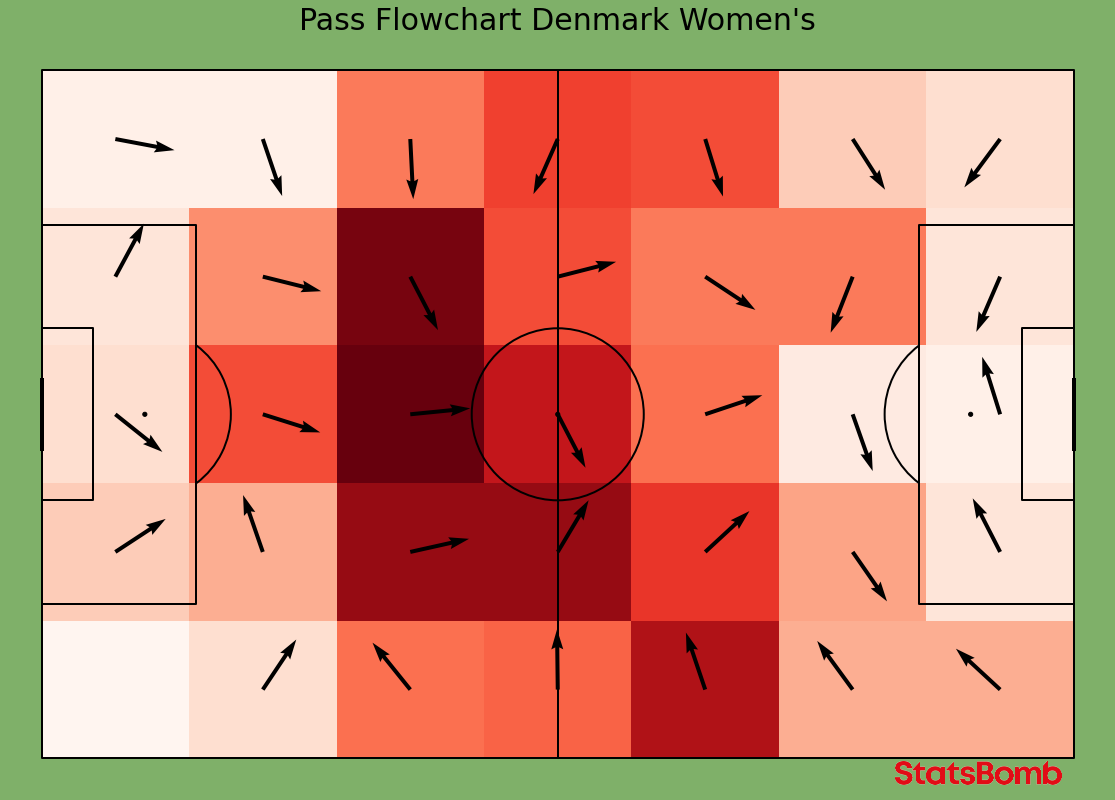

In [29]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(pitchColor)

bins = (7, 5)

bs_heatmap = pitch.bin_statistic(pass_den.x_start, pass_den.y_start, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')

fm = pitch.flow(pass_den.x_start, pass_den.y_start, pass_den.x_end, pass_den.y_end,
                color='black', arrow_type='same',
                arrow_length=7, bins=bins, ax=ax)

ax.set_title(f"Pass Flowchart {hteam}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pass Flowchart {hteam}', dpi=300, bbox_inches='tight')

In [72]:
pass_fin = df[df.type == "Pass"]
pass_fin = pass_fin[pass_fin.team == ateam]
pass_fin = pass_fin[(pass_fin["pass_type"]!="Kick Off") & (pass_fin["pass_type"]!="Goal Kick") 
                    & (pass_fin["pass_type"]!="Free Kick") & (pass_fin["pass_type"]!="Throw-in") 
                    & (pass_fin["pass_type"]!="Corner") & (pass_fin["pass_outcome"]!="Incomplete") 
                    & (pass_fin["pass_outcome"]!="Pass Offisde") & (pass_fin["pass_outcome"]!="Out") 
                    & (pass_fin["pass_outcome"]!="Unknown")]

pass_fin = pass_fin[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                     "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_fin['x_start'] = pass_fin.location.apply(lambda x: x[0])
pass_fin['y_start'] = pass_fin.location.apply(lambda x: x[1])

pass_fin['x_end'] = pass_fin.pass_end_location.apply(lambda x: x[0])
pass_fin['y_end'] = pass_fin.pass_end_location.apply(lambda x: x[1])
pass_fin = pass_fin.drop('location', axis=1)
pass_fin = pass_fin.drop('pass_end_location', axis=1)

countPass_fin = pass_fin.shape[0]

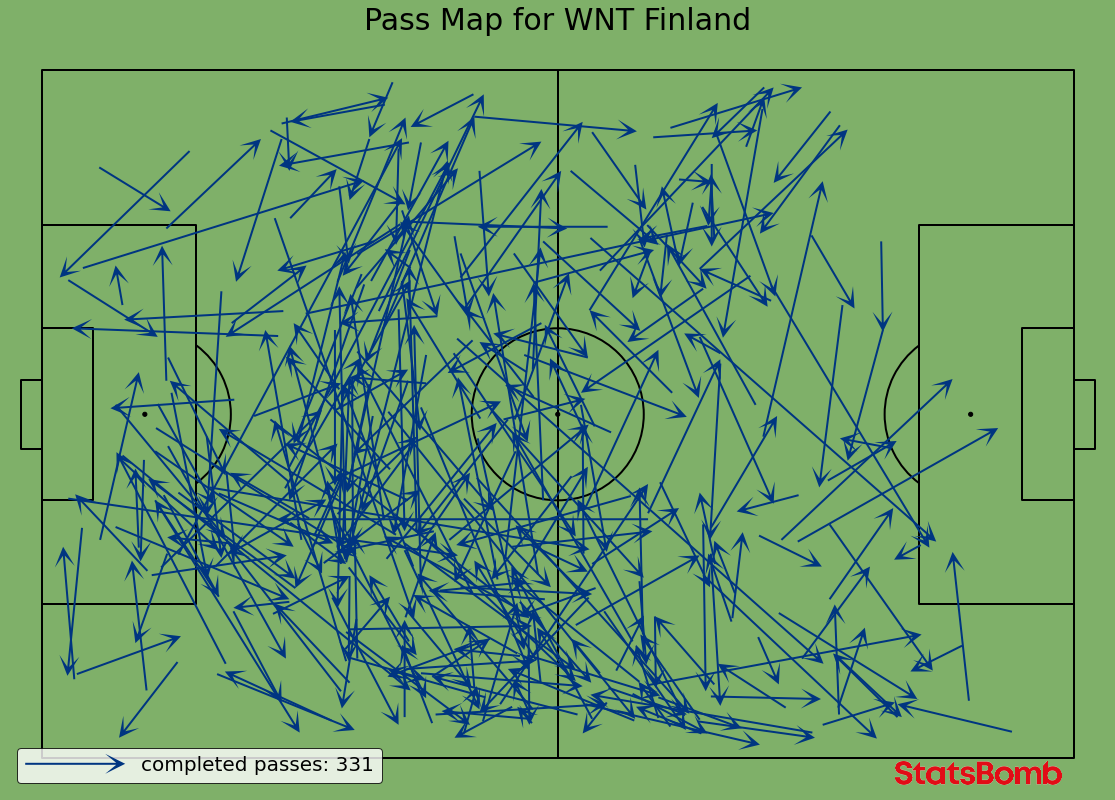

In [96]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pitch.arrows(pass_fin.x_start, pass_fin.y_start,
             pass_fin.x_end, pass_fin.y_end, width=2,
             headwidth=10, headlength=10, color=ateamColor, ax=ax, label=f'completed passes: {countPass_fin}', alpha = 1)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Map for {ateam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Map {ateam}', dpi=300, bbox_inches='tight')

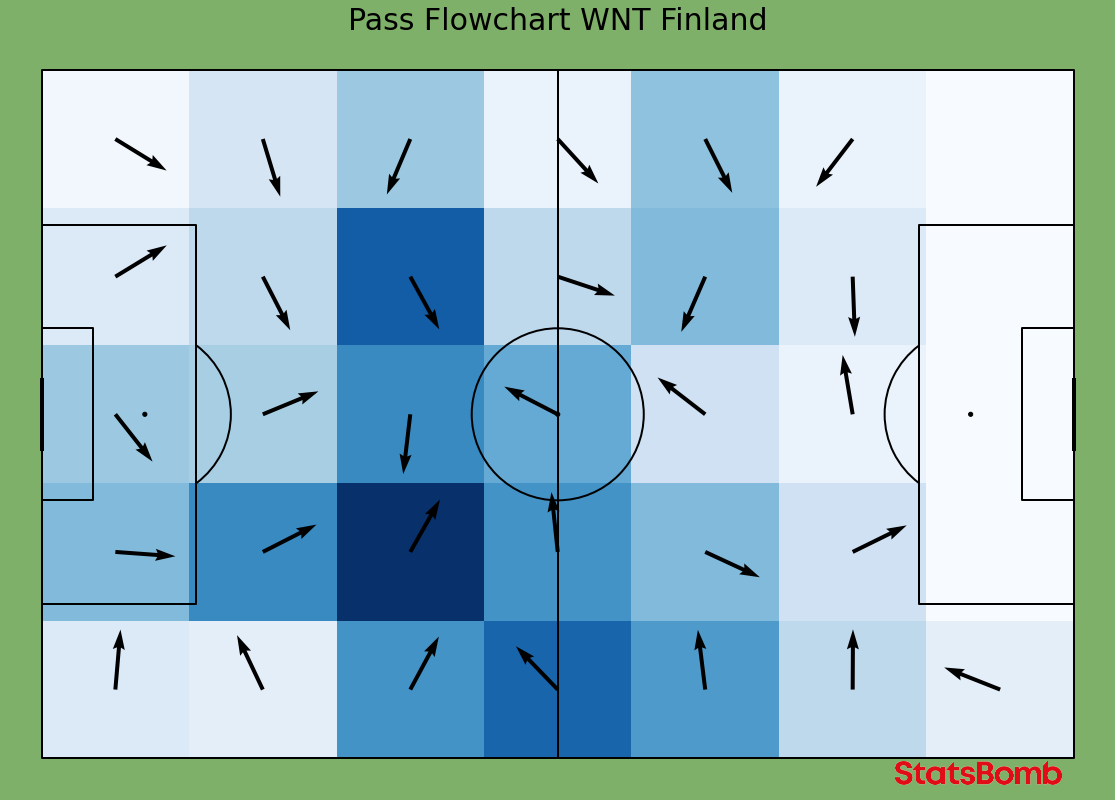

In [32]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(pitchColor)

bs_heatmap = pitch.bin_statistic(pass_fin.x_start, pass_fin.y_start, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')

fm = pitch.flow(pass_fin.x_start, pass_fin.y_start, pass_fin.x_end, pass_fin.y_end,
                color='black', arrow_type='same',
                arrow_length=7, bins=bins, ax=ax)

ax.set_title(f"Pass Flowchart {ateam}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pass Flowchart {ateam}', dpi=300, bbox_inches='tight')

In [33]:
pass_den_map = pass_den

pass_den_map["passer"] = pass_den_map["player_id"]
pass_den_map["recipient"] = pass_den_map["player_id"].shift(-1)

subs = dfDen[dfDen["type"] =="Substitution"]
subs = subs["minute"]
firstSub = subs.min()

pass_den_map = pass_den_map[pass_den_map["minute"]<firstSub]

In [34]:
starting_player_numbers = ["9", "11", "10", "7", "13", "4", "20", "2", "3", "19", "1"]

average_locations = pass_den_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locations.columns = ["x_start","y_start", "count", ]
average_locations["jersey_number"] = starting_player_numbers
average_locations.sort_values(by="passer", ascending=True)

harder_location = average_locations[average_locations["jersey_number"]== "10"]

pass_between = pass_den_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_between.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_between = pass_between.merge(average_locations, left_on="passer", right_index = True)
pass_between = pass_between.merge(average_locations, left_on="recipient", right_index = True, suffixes=["","_end"])

MAX_LINE_WIDTH = 14
MAX_MARKER_SIZE = 3000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)
harder_location['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.7
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

C:\Users\Gusse\AppData\Local\Temp\ipykernel_4088\660942509.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harder_location['marker_size'] = (average_locations['count']


Text(0.5, 1.0, "Pass Network Denmark Women's")

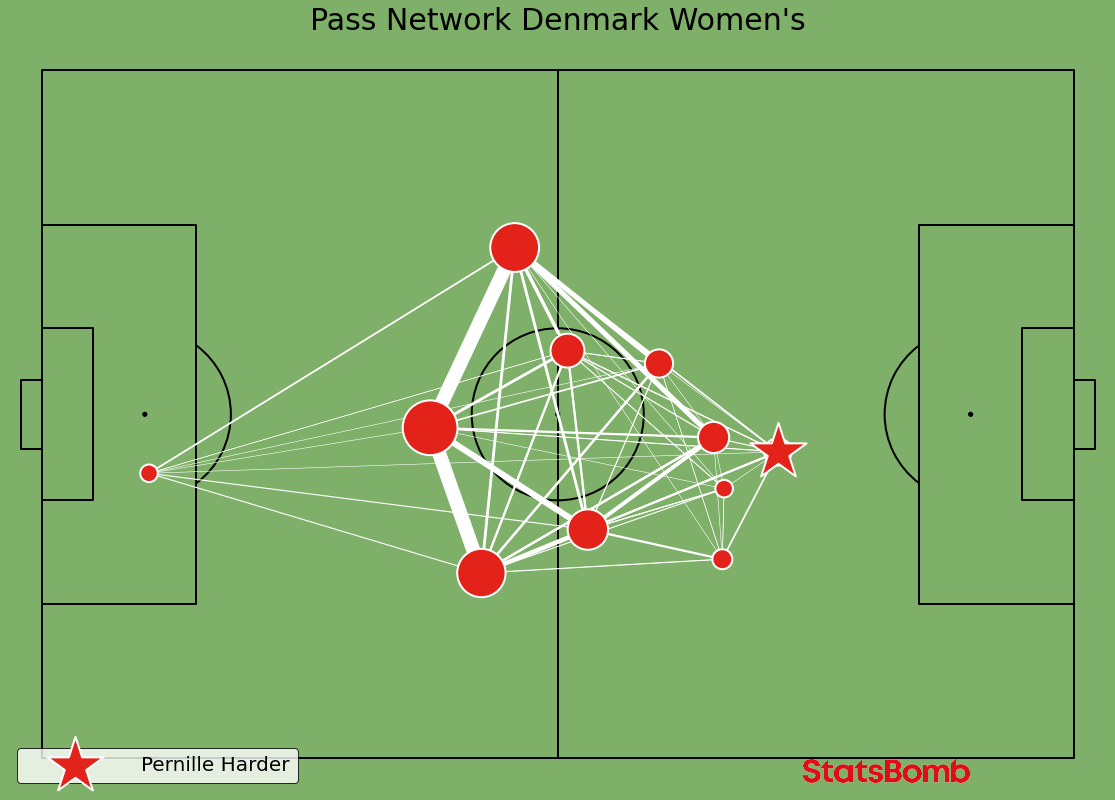

In [35]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color=linesColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)

pitch.arrows(70, 5, 100, 5, ax=axs["pitch"], color= hteamColor)


pass_lines = pitch.lines(pass_between.x_start, pass_between.y_start,
                         pass_between.x_start_end, pass_between.y_start_end, lw=pass_between.width,
                         color="white", zorder=1, ax=ax)


pass_nodes = pitch.scatter(average_locations.x_start, average_locations.y_start,
                           s=average_locations.marker_size,
                           color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax)


harder = pitch.scatter(harder_location.x_start, harder_location.y_start,
                           s=3500,
                           marker= "*", color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1,
                       ax=ax, label = "Pernille Harder")

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.65, 0.016, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Network {hteam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Network, {hteam}', dpi=300, bbox_inches='tight')

In [36]:
pass_fin_map = pass_fin

pass_fin_map["passer"] = pass_fin_map["player_id"]
pass_fin_map["recipient"] = pass_fin_map["player_id"].shift(-1)

subsFin = dfFin[dfFin["type"] =="Substitution"]
subsFin = subsFin["minute"]
firstSubFin = subsFin.min()

pass_fin_map = pass_fin_map[pass_fin_map["minute"]<firstSubFin]

In [37]:
average_locationsFin = pass_fin_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locationsFin.columns = ["x_start","y_start", "count", ]
average_locationsFin.sort_values(by="passer", ascending=True)


pass_betweenFin = pass_fin_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_betweenFin.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="passer", right_index = True)
pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="recipient", right_index = True, suffixes=["","_end"])


MAX_LINE_WIDTH_FIN = 14
MAX_MARKER_SIZE_FIN = 2500
pass_betweenFin['width'] = (pass_betweenFin.pass_count / pass_betweenFin.pass_count.max() *
                           MAX_LINE_WIDTH_FIN)
average_locationsFin['marker_size'] = (average_locationsFin['count']
                                         / average_locationsFin['count'].max() * MAX_MARKER_SIZE_FIN)

Text(0.5, 1.0, 'Pass Network For WNT Finland')

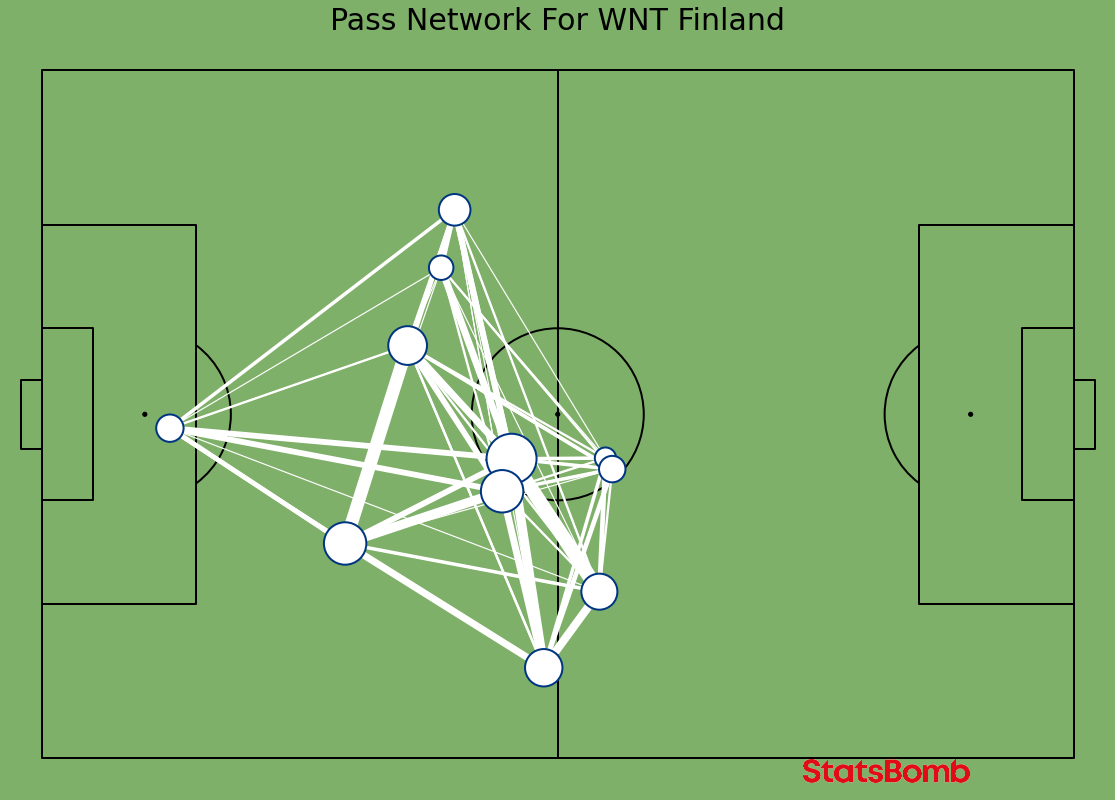

In [38]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color=linesColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pass_lines = pitch.lines(pass_betweenFin.x_start, pass_betweenFin.y_start,
                         pass_betweenFin.x_start_end, pass_betweenFin.y_start_end, lw=pass_betweenFin.width,
                         zorder=1, ax=ax, color= "white")


pass_nodes = pitch.scatter(average_locationsFin.x_start, average_locationsFin.y_start,
                           s=average_locationsFin.marker_size,
                           color= "white", edgecolors=ateamColor, linewidth=2, alpha=1, ax=ax, label = "Finland Player")
ax3 = fig.add_axes([0.65, 0.016, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)


ax.set_title(f"Pass Network For {ateam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Network, {ateam}', dpi=300, bbox_inches='tight')

In [97]:
harderEvents = df[df["player"]== MVP]
harderEvents = harderEvents[(harderEvents["type"]!= 'Ball Receipt*') & (harderEvents["type"]!= 'Injury Stoppage') 
                            & (harderEvents["type"]!= 'Player Off') & (harderEvents["type"]!= 'Player On') 
                            & (harderEvents["type"]!= 'Substitution') & (harderEvents["type"]!= 'Miscontrol')]

harderEvents = harderEvents[[ 'player',"player_id", 'minute', 'second', 'location',  "type", 
                             "under_pressure", "dribble_outcome", "duel_type"]]

harderEvents['x'] = harderEvents.location.apply(lambda x: x[0])
harderEvents['y'] = harderEvents.location.apply(lambda x: x[1])
harderEvents = harderEvents.drop('location', axis=1)

BallRecovery = harderEvents[harderEvents.type == 'Ball Recovery']
Interception = harderEvents[harderEvents.type == 'Interception']
Dribble = harderEvents[harderEvents.type == 'Dribble']
Tackle = harderEvents[harderEvents.duel_type == "Tackle"]

countBallRecovery = BallRecovery.shape[0]
countInterception = Interception.shape[0]
countDribble = Dribble.shape[0]
countTackle = Tackle.shape[0]

xgDen = dfDen["shot_statsbomb_xg"].sum()

In [40]:
harderURL = "https://images.fotmob.com/image_resources/playerimages/200707.png"
response = requests.get(harderURL)
harderPic = Image.open(BytesIO(response.content))

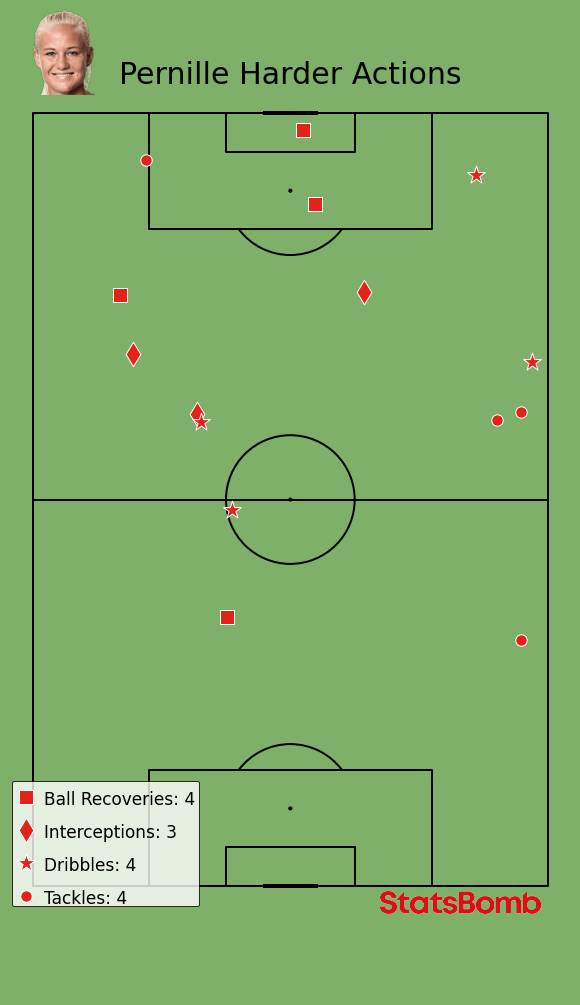

In [98]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor)
fig, axs= pitch.grid(figheight=16, title_height=0.06, axis=False)
fig.set_facecolor(figColor)

scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c= hteamColor, edgecolor = "white",
                                 s=200, marker='s',  ax=axs['pitch'], label = f"Ball Recoveries: {countBallRecovery}")

scatter_interception = pitch.scatter(Interception.x, Interception.y, c= hteamColor,
                                     s=300, marker='d', edgecolor = "white", ax=axs['pitch'], label = f"Interceptions: {countInterception}")

scatter_dribble = pitch.scatter(Dribble.x, Dribble.y, c= hteamColor, edgecolor= "white",
                                s=350, marker='*',  ax=axs['pitch'], label = f"Dribbles: {countDribble}")

scatter_tackle = pitch.scatter(Tackle.x, Tackle.y, c=hteamColor, edgecolor= "white",
                               s=520, marker=".",  ax=axs['pitch'], label = f"Tackles: {countTackle}")

axs["title"].text (0.5, 0.01, f"{MVPname} Actions", color= textColor, va="center", ha="center", fontsize=30)


ax3 = fig.add_axes([0.65, 0.033, 0.27, 0.24])
ax3.axis('off')
ax3.imshow(im)

ax4 = fig.add_axes([0.05, 0.77, 0.14, 0.24])
ax4.axis('off')
ax4.imshow(harderPic)

legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5, edgecolor="black")
for text in legend.get_texts():
    text.set_fontsize(17)
    text.set_va('center')


#plt.savefig(f'viz/{MVPname} Actions, Denmark v Finland', dpi=300, bbox_inches='tight')

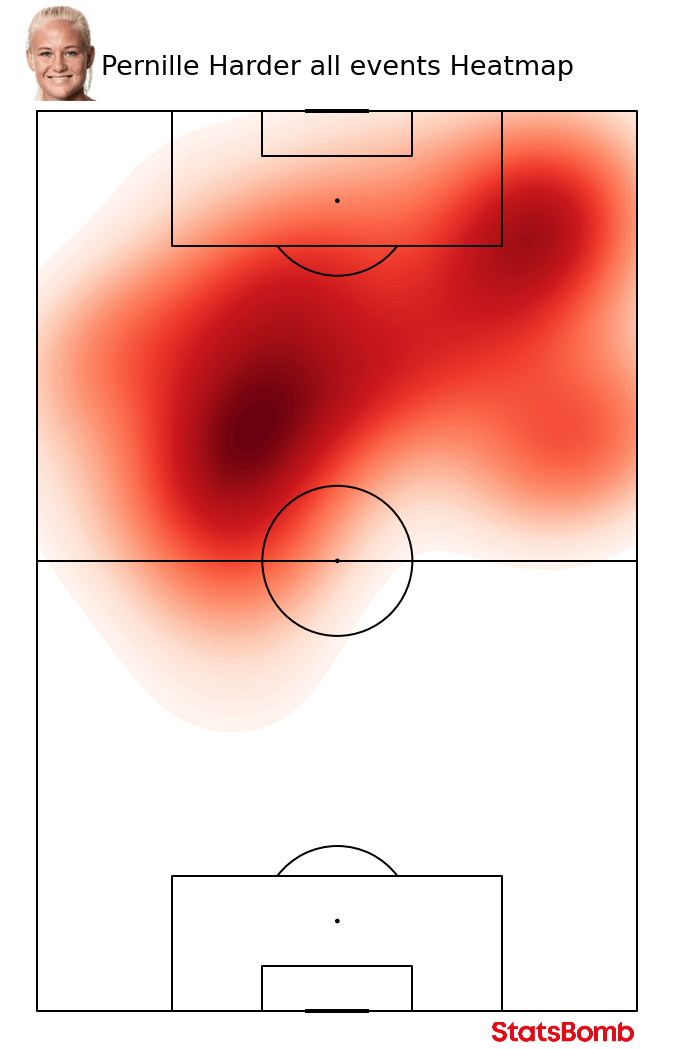

In [80]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color="white",  line_color=linesColor, line_zorder=2)
fig, ax = pitch.draw(figsize=(11, 14))
fig.set_facecolor("white")

kde = pitch.kdeplot(harderEvents.x, harderEvents.y, ax=ax,
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1,
                    cmap="Reds")

ax.set_title(f"{MVPname} all events Heatmap", fontsize=27, color= textColor)

logo = fig.add_axes([0.65, 0.010, 0.27, 0.02])
logo.axis('off')
logo.imshow(im)

pic = fig.add_axes([0.09, 0.87, 0.12, 0.24])
pic.axis('off')
pic.imshow(harderPic)

#plt.savefig(f'viz/{MVPname} Heatmap, All Events', dpi=300, bbox_inches='tight')

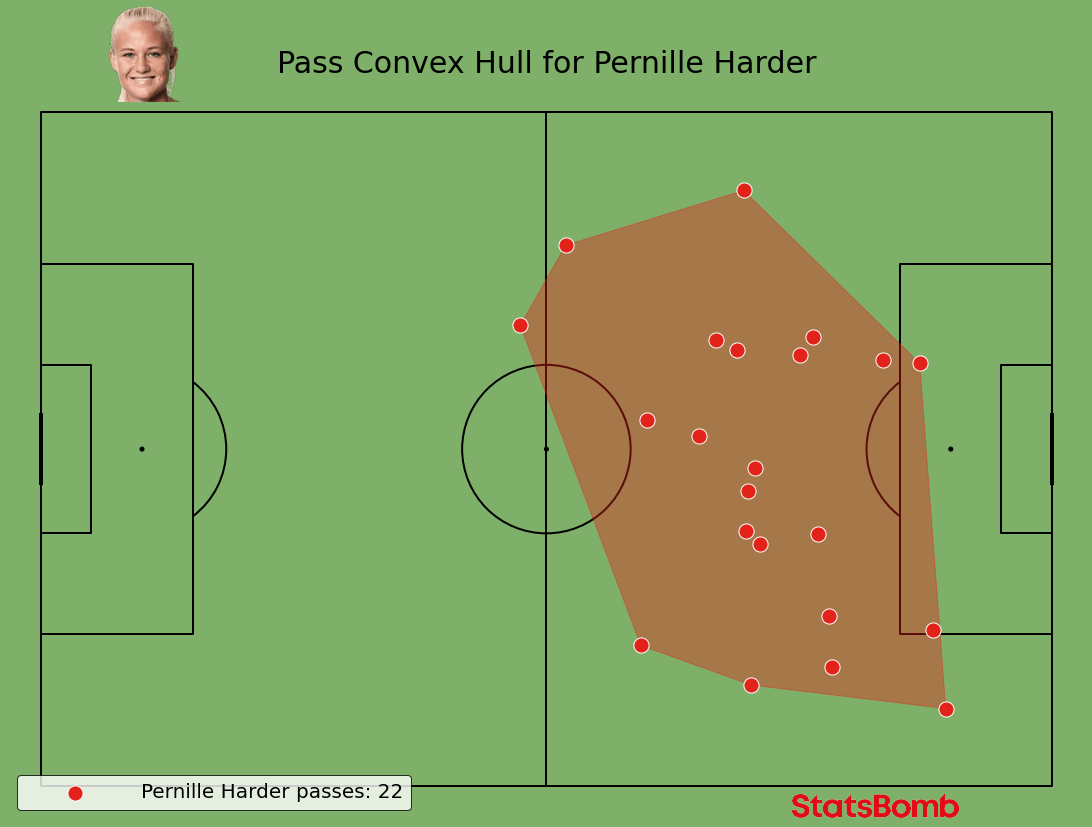

In [120]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=1, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11))
fig.set_facecolor(pitchColor)
hull = pitch.convexhull(passHarder.x_start, passHarder.y_start)
poly = pitch.polygon(hull, ax=ax, edgecolor=hteamColor, facecolor=hteamColor, alpha=0.4, zorder=2)
scatter = pitch.scatter(passHarder.x_start, passHarder.y_start, ax=ax, edgecolor='white', facecolor=hteamColor,
                        s=230, zorder=3, label=f"{MVPname} passes: {countPassHarder}")

ax.set_title(f"Pass Convex Hull for {MVPname}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.65, 0.016, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

pic = fig.add_axes([0.09, 0.92, 0.12, 0.12])
pic.axis('off')
pic.imshow(harderPic)

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

plt.savefig(f'viz/Pass Convex Hull for {MVPname}', dpi=300, bbox_inches='tight')

In [46]:
xgDen = dfDen["shot_statsbomb_xg"].sum()
xgDen = str(round(xgDen, 2))
xgFin = dfFin["shot_statsbomb_xg"].sum()
xgFin = str(round(xgFin, 2))

In [84]:
compPassesDen = pass_den.shape[0]
compPassesFin = pass_fin.shape[0]

In [48]:
goalScorer = (goals["player"]).sum()
goalScorer

'Harder'

In [49]:
ascore = (goals_fin["shot_outcome"]=='Goal').sum()
hscore = (goals["shot_outcome"]=='Goal').sum()

In [50]:
print("      Fulltime Score:")
print(hteam,":", hscore, "-",ateam, ":", ascore)
print("xG:    ", xgDen,"   -    ", xgFin)
print("Passes:",compPassesDen,"    -    ", compPassesFin)
print("shots: ", shotsDen,"     -    ", shotsFin)

      Fulltime Score:
Denmark Women's : 1 - WNT Finland : 0
xG:     2.37    -     0.25
Passes: 435     -     331
shots:  18      -     9


Text(0.5, 1.0, '[2,3]')

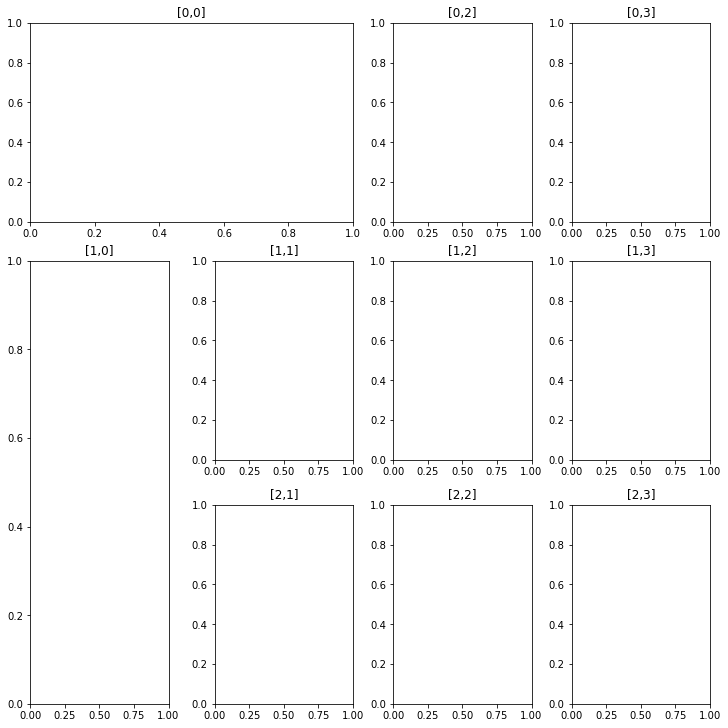

In [50]:
fig = plt.figure(figsize=(10,10),constrained_layout = True)

gs = fig.add_gridspec(nrows=3, ncols=4)

ax1= fig.add_subplot(gs[0,:2])
ax1.set_title("[0,0]")


ax3= fig.add_subplot(gs[0,2])
ax3.set_title("[0,2]")

ax4= fig.add_subplot(gs[0,3])
ax4.set_title("[0,3]")

ax5= fig.add_subplot(gs[1:,0])
ax5.set_title("[1,0]")

ax6= fig.add_subplot(gs[1,1])
ax6.set_title("[1,1]")

ax7= fig.add_subplot(gs[1,2])
ax7.set_title("[1,2]")

ax8= fig.add_subplot(gs[1,3])
ax8.set_title("[1,3]")

ax10= fig.add_subplot(gs[2,1])
ax10.set_title("[2,1]")

ax11= fig.add_subplot(gs[2,2])
ax11.set_title("[2,2]")

ax12= fig.add_subplot(gs[2,3])
ax12.set_title("[2,3]")